In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import SimpleRNN, LSTM, Dense
from tensorflow.keras import Sequential

y = sin(2x) + cos(x)

In [2]:
# data 생성

x = np.arange(0, 100, 0.1)
y = np.sin(2*x) + np.cos(x)

seq_data = y.reshape(-1,1)

print(seq_data.shape)
print(seq_data[:5])

(1000, 1)
[[1.        ]
 [1.1936735 ]
 [1.36948492]
 [1.51997896]
 [1.63841708]]


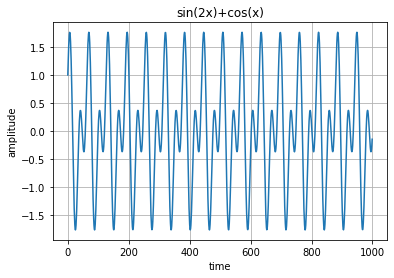

In [3]:
plt.grid()
plt.title('sin(2x)+cos(x)')
plt.xlabel('time')
plt.ylabel('amplitude')
plt.plot(seq_data)

plt.show()

In [4]:
def seq2dataset(seq, window, horizon):

    X = []
    Y = []

    for i in range(len(seq)-(window+horizon)+1):

        x = seq[i:(i+window)]
        y = (seq[i+window+horizon-1])

        X.append(x)
        Y.append(y)

    return np.array(X), np.array(Y)

In [5]:
w = 20  # window size
h = 1  # horizon factor

X, Y = seq2dataset(seq_data, w, h)

print(X.shape, Y.shape)

(980, 20, 1) (980, 1)


In [6]:
split_ratio = 0.8

split = int(split_ratio*len(X))

x_train = X[0:split]
y_train = Y[0:split]

x_test = X[split:]
y_test = Y[split:]

print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(784, 20, 1) (784, 1) (196, 20, 1) (196, 1)


In [7]:
model = Sequential()

#model.add(SimpleRNN(units=128, activation='tanh',input_shape=x_train[0].shape))

model.add(SimpleRNN(units=128, activation='tanh',input_shape=(20,1)))

model.add(Dense(1))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn (SimpleRNN)       (None, 128)               16640     
_________________________________________________________________
dense (Dense)                (None, 1)                 129       
Total params: 16,769
Trainable params: 16,769
Non-trainable params: 0
_________________________________________________________________


In [8]:
model.compile(loss='mse', optimizer='adam', metrics=['mae'])

In [9]:
from datetime import datetime

start_time = datetime.now()

hist = model.fit(x_train, y_train, epochs=100, validation_data=(x_test, y_test))

end_time = datetime.now()

print('Elapsed Time => ', end_time-start_time)

Epoch 1/100
25/25 [==============================] - 4s 20ms/step - loss: 0.0548 - mae: 0.1539 - val_loss: 0.0039 - val_mae: 0.0515
Epoch 2/100
25/25 [==============================] - 0s 15ms/step - loss: 0.0014 - mae: 0.0284 - val_loss: 6.6290e-04 - val_mae: 0.0206
Epoch 3/100
25/25 [==============================] - 0s 15ms/step - loss: 3.8304e-04 - mae: 0.0159 - val_loss: 1.3405e-04 - val_mae: 0.0098
Epoch 4/100
25/25 [==============================] - 0s 15ms/step - loss: 8.3036e-05 - mae: 0.0073 - val_loss: 4.4532e-05 - val_mae: 0.0054
Epoch 5/100
25/25 [==============================] - 0s 14ms/step - loss: 3.2207e-05 - mae: 0.0048 - val_loss: 2.6137e-05 - val_mae: 0.0042
Epoch 6/100
25/25 [==============================] - 0s 14ms/step - loss: 2.4466e-05 - mae: 0.0040 - val_loss: 1.6571e-05 - val_mae: 0.0033
Epoch 7/100
25/25 [==============================] - 0s 13ms/step - loss: 1.7243e-05 - mae: 0.0034 - val_loss: 1.5277e-05 - val_mae: 0.0032
Epoch 8/100
25/25 [=============

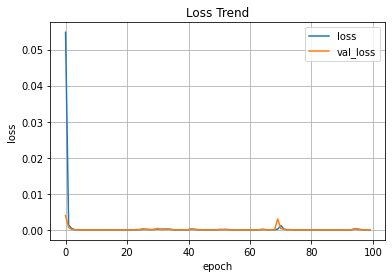

In [10]:
plt.title('Loss Trend')
plt.plot(hist.history['loss'], label='loss')
plt.plot(hist.history['val_loss'], label='val_loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.grid()
plt.legend(loc='best')

plt.show()

In [11]:
pred = model.predict(x_test)

print(pred.shape)

(196, 1)


In [12]:
rand_idx = np.random.randint(0, len(y_test), size=5)

print('random idx = ',rand_idx, '\n')

print('pred  = ', pred.flatten()[rand_idx])
print('label = ', y_test.flatten()[rand_idx])

#print(pred[rand_idx])
#print(y_test[rand_idx])

random idx =  [114  81 137 189 124] 

pred  =  [ 0.21866089  1.7312331   0.69993514 -0.29282752 -0.11809225]
label =  [ 0.21445792  1.7376515   0.69782559 -0.29520266 -0.12085209]


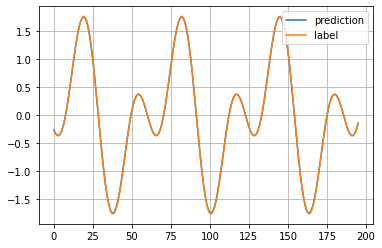

In [13]:
plt.plot(pred, label='prediction')
plt.plot(y_test, label='label')
plt.grid()
plt.legend(loc='best')

plt.show()

y = 0.5*sin(2x) - cos(x/2)

In [14]:
# data 생성

x = np.arange(0, 100, 0.1)
y = 0.5*np.sin(2*x) - np.cos(x/2.0)

seq_data = y.reshape(-1,1)

print(seq_data.shape)
print(seq_data[:5])

(1000, 1)
[[-1.        ]
 [-0.89941559]
 [-0.80029499]
 [-0.70644984]
 [-0.62138853]]


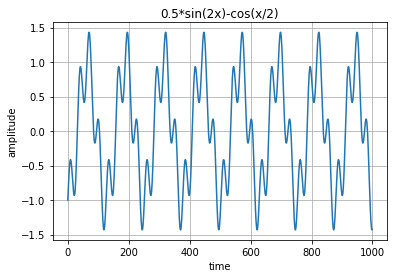

In [15]:
plt.grid()
plt.title('0.5*sin(2x)-cos(x/2)')
plt.xlabel('time')
plt.ylabel('amplitude')
plt.plot(seq_data)

plt.show()

In [16]:
w = 20  # window size
h = 1  # horizon factor

X, Y = seq2dataset(seq_data, w, h)

print(X.shape, Y.shape)

(980, 20, 1) (980, 1)


In [17]:
split_ratio = 0.8

split = int(split_ratio*len(X))

x_train = X[0:split]
y_train = Y[0:split]

x_test = X[split:]
y_test = Y[split:]

print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(784, 20, 1) (784, 1) (196, 20, 1) (196, 1)


In [18]:
model = Sequential()

model.add(SimpleRNN(units=128, activation='tanh', input_shape=x_train[0].shape))

model.add(Dense(1))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_1 (SimpleRNN)     (None, 128)               16640     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 129       
Total params: 16,769
Trainable params: 16,769
Non-trainable params: 0
_________________________________________________________________


In [19]:
model.compile(loss='mse', optimizer='adam', metrics=['mae'])

In [20]:
from datetime import datetime

start_time = datetime.now()

hist = model.fit(x_train, y_train, 
                 epochs=100, 
                 validation_data=(x_test, y_test))

end_time = datetime.now()

print('Elapsed Time => ', end_time-start_time)

Epoch 1/100
25/25 [==============================] - 1s 20ms/step - loss: 0.0713 - mae: 0.1815 - val_loss: 0.0045 - val_mae: 0.0574
Epoch 2/100
25/25 [==============================] - 0s 14ms/step - loss: 0.0032 - mae: 0.0471 - val_loss: 0.0025 - val_mae: 0.0370
Epoch 3/100
25/25 [==============================] - 0s 16ms/step - loss: 0.0013 - mae: 0.0284 - val_loss: 9.9288e-04 - val_mae: 0.0230
Epoch 4/100
25/25 [==============================] - 0s 15ms/step - loss: 6.5148e-04 - mae: 0.0200 - val_loss: 4.1135e-04 - val_mae: 0.0149
Epoch 5/100
25/25 [==============================] - 0s 15ms/step - loss: 3.9934e-04 - mae: 0.0154 - val_loss: 3.6498e-04 - val_mae: 0.0156
Epoch 6/100
25/25 [==============================] - 0s 15ms/step - loss: 3.7522e-04 - mae: 0.0149 - val_loss: 1.7431e-04 - val_mae: 0.0091
Epoch 7/100
25/25 [==============================] - 0s 14ms/step - loss: 1.6333e-04 - mae: 0.0094 - val_loss: 1.5719e-04 - val_mae: 0.0098
Epoch 8/100
25/25 [=====================

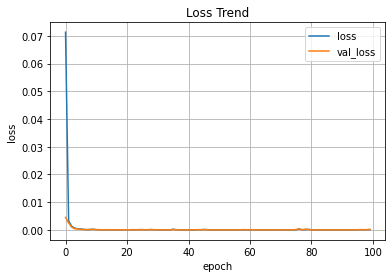

In [21]:
plt.title('Loss Trend')
plt.plot(hist.history['loss'], label='loss')
plt.plot(hist.history['val_loss'], label='val_loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.grid()
plt.legend(loc='best')

plt.show()

In [22]:
pred = model.predict(x_test)

print(pred.shape)

(196, 1)


In [32]:
rand_idx = np.random.randint(0, len(y_test), size=5)

print('random idx = ',rand_idx, '\n')

print('pred  = ', pred.flatten()[rand_idx])
print('label = ', y_test.flatten()[rand_idx])

rand_idx = np.random.randint(0, len(y_test), size=5)

print('\n\nrandom idx = ',rand_idx, '\n')

print('pred  = ', pred.flatten()[rand_idx])
print('label = ', y_test.flatten()[rand_idx])

random idx =  [134  17  17  22 181] 

pred  =  [ 0.5648238   1.3228788   1.3228788   1.3594571  -0.13092087]
label =  [ 0.58476182  1.34955716  1.34955716  1.37872936 -0.12930711]


random idx =  [135 138 132 115   3] 

pred  =  [0.6439476  0.92936814 0.44922176 0.88762265 0.41067532]
label =  [0.6645118  0.95200773 0.46682425 0.88649639 0.41993181]


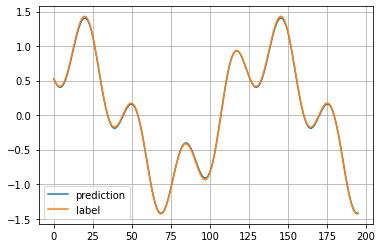

In [33]:
plt.plot(pred, label='prediction')
plt.plot(y_test, label='label')
plt.grid()
plt.legend(loc='best')

plt.show()